<a href="https://colab.research.google.com/github/Hamid-abdellaoui/Stock-Prediction-Using-Python-Machine-Learning/blob/main/Stock_Prediction_Using_Python_%26_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Prediction Using Python & Machine Learning**


In [34]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [35]:
df = web.DataReader('AAPL',data_source='yahoo',start='2013-01-01',end='2021-06-10')

In [36]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.010899
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.796177
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.328323
2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.232281
2013-01-08,18.996071,18.616072,18.900356,18.761070,458707200.0,16.275965
...,...,...,...,...,...,...
2021-06-04,126.160004,123.849998,124.070000,125.889999,75087300.0,125.889999
2021-06-07,126.320000,124.830002,126.169998,125.900002,71057600.0,125.900002
2021-06-08,128.460007,126.209999,126.599998,126.739998,74403800.0,126.739998


In [37]:
df.shape

(2125, 6)

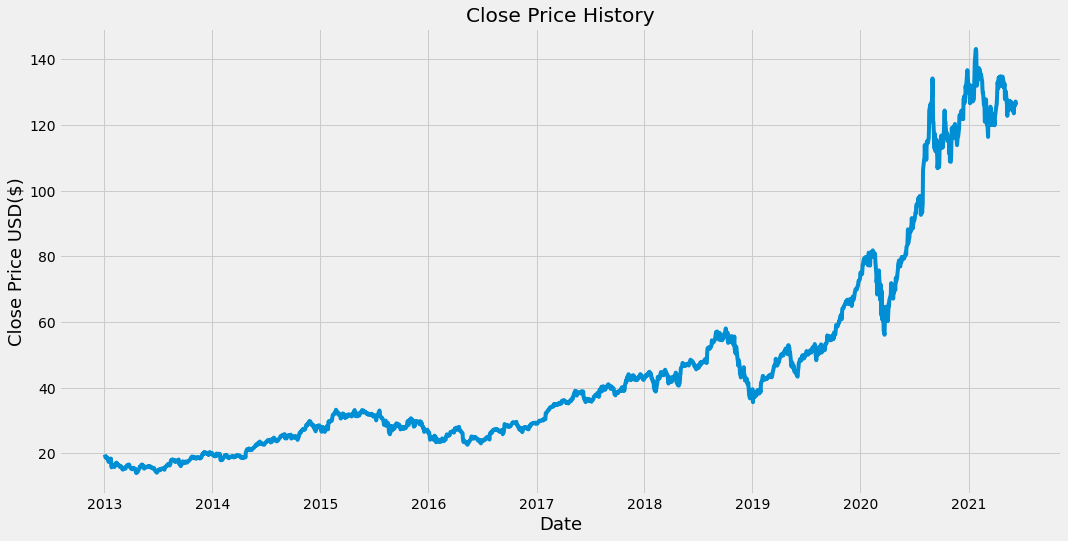

In [38]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [39]:
data=df.filter(['Close'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8)

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.04380933],
       [0.04189388],
       [0.03772025],
       ...,
       [0.87292247],
       [0.87594075],
       [0.8680468 ]])

In [40]:
#Create training data set

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]


for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:

    print(x_train)
    print(y_train)
    print()

[array([0.04380933, 0.04189388, 0.03772025, 0.03686341, 0.03725313,
       0.0349839 , 0.03675563, 0.03586838, 0.03074117, 0.02636576,
       0.03194073, 0.03099821, 0.03025747, 0.03157589, 0.03412982,
       0.01657569, 0.01364032, 0.0163905 , 0.0187233 , 0.01832529,
       0.01795492, 0.01743805, 0.01431474, 0.01860446, 0.01846902,
       0.02147349, 0.02334195, 0.02471012, 0.02138504, 0.02113904,
       0.02102296, 0.01924571, 0.01919871, 0.01611963, 0.01534846,
       0.01666137, 0.01444741, 0.01615279, 0.01493663, 0.01406045,
       0.0110394 , 0.00815932, 0.01122458, 0.00970992, 0.0110698 ,
       0.0113849 , 0.01308475, 0.01047554, 0.01045343, 0.0116005 ,
       0.01468511, 0.01801849, 0.01767853, 0.01701239, 0.01719205,
       0.01972941, 0.02019099, 0.01951658, 0.01701239, 0.01440871])]
[0.010608216319641275]



In [41]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(1640, 60)

In [42]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1640, 60, 1)

In [43]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [44]:
#copile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [45]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1640/1640 [==============================] - 38s 21ms/step - loss: 6.6048e-04


In [51]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [52]:
#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [53]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [54]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

7.279658504769077

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


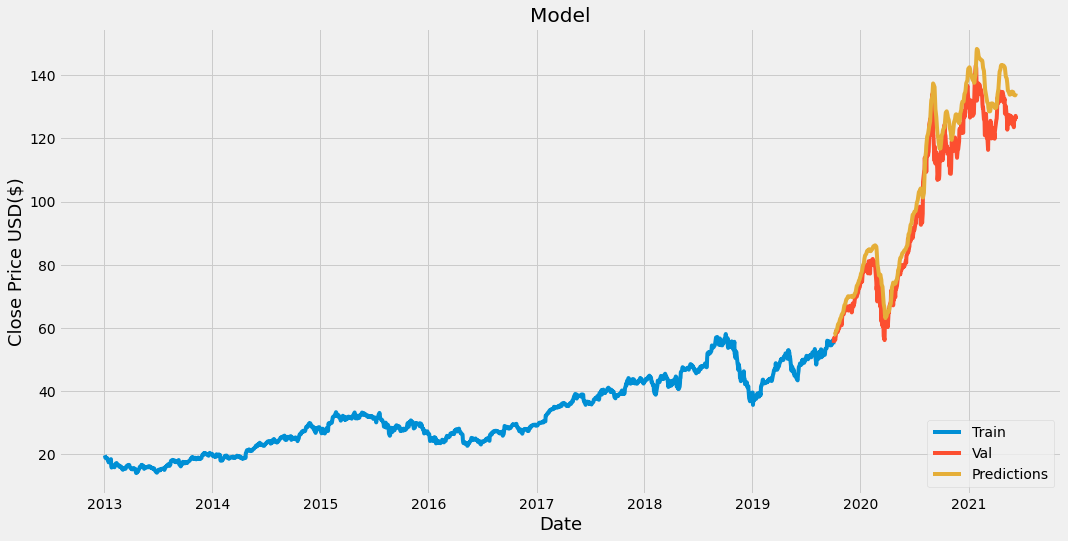

In [55]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [56]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-10-03,55.205002,57.681858
2019-10-04,56.752499,57.707031
2019-10-07,56.764999,57.900589
2019-10-08,56.099998,58.168407
2019-10-09,56.757500,58.372215
...,...,...
2021-06-04,125.889999,133.747650
2021-06-07,125.900002,133.645279
2021-06-08,126.739998,133.686920


In [63]:
#Get the quote
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2013-01-01',end='2021-06-09')
#create a new dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data to a numpy array
X_test=np.array(X_test)
#reshape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[134.26433]]


In [62]:
#Get the quote
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2021-06-10',end='2021-06-10')
print(apple_quote2['Close'])

Date
2021-06-10    126.110001
Name: Close, dtype: float64
